# imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')
# --------------------------------------------------

# --------------------------------------------------
# load datasets
from sklearn import datasets

# imblearn.sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# preprocessing.encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder # pd.get_dummies
# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# preprocessing.binarizing
from sklearn.preprocessing import Binarizer

# decomposition.PCA
from sklearn.decomposition import PCA
# stats : R module
from scipy.stats import skew, kurtosis

# estimators ---------------------------------------
# estimators.classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # classifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV # regressor 응용
# estimators.regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# --------------------------------------------------

# ensemble -----------------------------------------
# ensemble.bagging
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# ensemble.boosting
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
# ensemble.boosting & bagging
from xgboost import XGBRFClassifier, XGBRFRegressor
# ensemble.voting
from sklearn.ensemble import VotingClassifier, VotingRegressor
# --------------------------------------------------

# metrics ------------------------------------------
# metrics.scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss
# metrics.reports
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# metrics.errors
from sklearn.metrics import mean_squared_error     # 'neg_mean_squared_error', 'neg_root_mean_squared_error'
from sklearn.metrics import mean_squared_log_error # 'neg_mean_squared_log_error'
from sklearn.metrics import mean_absolute_error    # 'neg_mean_absolute_error'
# metrics.curves
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve
# --------------------------------------------------

# model_selection ----------------------------------
# model_selection.splitter
from sklearn.model_selection import train_test_split       # function
# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------


# --------------------------------------------------
def check_nan(df):
    nan = df.isna().sum()[df.isna().sum() != 0]
    nan_cols = list(nan.index)
    nan_cnt  = df[nan_cols].isna().sum()
    rate = round(nan_cnt / df.shape[0] * 100, 2)
    nan_df = pd.DataFrame({'NAN_CNT':nan_cnt, 'RATE':rate})
    
    print(nan_df)
    print('-' * 30)
    print('nan_cols count =', len(nan_cols))
    print(nan_cols)
 
    for col in nan_cols:
        print('-' * 30)
        print(df[col].value_counts())
        print('value_counts =', df[col].count(), '/ nan_counts =', df[col].isna().sum())
    
    return nan_cols
# nan_cols = check_nan(df)
# --------------------------------------------------


# --------------------------------------------------
def check_outliers(X_train, features, rate=1.5):
    
    dict = {}
    
    for col in features:
        
        Q1 = np.percentile(X_train[col], 25) 
        Q3 = np.percentile(X_train[col], 75) 
        IQR = Q3 - Q1
        
        min = Q1 - (rate * IQR)
        max = Q3 + (rate * IQR)
        
        idxs = X_train[(X_train[col] < min) | (X_train[col] > max)].index
        
        dict[col] = idxs
        
    return dict
# check_outliers(X_train, 'Insulin')
# --------------------------------------------------


# --------------------------------------------------
def scores(y_test, y_pred):
    
    """evaluation scores"""
    
    f1        = f1_score         (y_test, y_pred, average='macro')
    accuracy  = accuracy_score   (y_test, y_pred, )
    precision = precision_score  (y_test, y_pred, average='macro')
    recall    = recall_score     (y_test, y_pred, average='macro')
    c_matrix  = confusion_matrix (y_test, y_pred, )
    
    print(
          f'accuracy  = {accuracy:.6f},  '
          f'f1 score  = {f1:.6f},  \n'
          f'precision = {precision:.6f},  '
          f'recall    = {recall:.6f},')
    print(c_matrix)
    
    # plt.figure(figsize=(12, 9))
    # plt.title('confusion matrix')
    # plt.xlabel('Predict')
    # plt.ylabel('Actual')
    # sns.heatmap(c_matrix, annot=True, linewidths=1, cmap='Blues', annot_kws={"size": 14})
    # plt.show()
# --------------------------------------------------

# --------------------------------------------------
def curves(y_test, probas_pred):
        
    FPRS, TPRS, thresholds = roc_curve(y_test, probas_pred[:, 1])
 
    f, ax = plt.subplots(1, 2, figsize=(16, 6))
 
    # settings
    plt.subplot(121)
    plt.title('ROC curve')
    plt.gray()
    plt.xlabel('FPR(1- specificity)')
    plt.ylabel('TPR')
 
    # x, y values
    plt.plot(FPRS, TPRS, label='ROC', linestyle='solid')
    plt.plot([0, 1], [0, 1], label='50%', color='gray', linestyle=':')
    plt.legend()
 
    precisions, recalls, thresholds = precision_recall_curve(y_test, probas_pred[:, 1])
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
 
    plt.subplot(122)
    plt.title('precision recall curve')
    plt.gray()
    plt.xlabel('threshold')
    plt.ylabel('scores')
 
    # x, y values
    plt.plot(thresholds, precisions[:thresholds.shape[0]], label='precision', linestyle=':')
    plt.plot(thresholds, recalls[:thresholds.shape[0]],    label='recall',    linestyle='--')
    plt.plot(thresholds, f1_scores[:thresholds.shape[0]],  label='f1',        linestyle='solid')
    # valid linestyle = '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
    plt.legend()
 
    plt.show()
    
    print('AUC = ', roc_auc_score(y_test, probas_pred[:, 1]))
# --------------------------------------------------

# metrics imports

In [ ]:
# # classification GridsearchCV : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # models
# classification_models = [RandomForestClassifier(),
#                          GradientBoostingClassifier(),
#                          XGBClassifier(), 
#                          XGBRFClassifier(), 
#                          LGBMClassifier(), 
#                          CatBoostClassifier(),
#                          ]

# # param_grid=
# hyper_param = {'n_estimators':[100],
#                'random_state':[0],
#               #  'min_samples_split':[2],
#               #  'min_samples_leaf':[1],
#                }

# # scoring=
# classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
#                           'precision':'precision_macro', 'recall':'recall_macro', 
#                           'roc_auc_ovr':'roc_auc_ovr',}

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cv_results_ cols
# classification_cols = ['mean_test_f1_macro', 'mean_test_accuracy', 
#                        'mean_test_precision', 'mean_test_recall', 'mean_test_roc_auc_ovr',]

# # GridSearchCV loop
# for model in classification_models:
        
#         gscv = GridSearchCV(model, param_grid=hyper_param, 
#                             scoring=classification_scorers, refit='f1_macro', 
#                             cv=skf, return_train_score=True)
#         gscv.fit(X_met, y_met)
#         results = gscv.cv_results_
        
#         print('-' * 75)
#         print('estimtor        =', gscv.estimator)
#         print('best_params_    =', gscv.best_params_)
#         print('best_score_     =', gscv.best_score_)
        
#         met_df = pd.DataFrame(results)[classification_cols]
#         met_df.columns = ['f1_macro', 'accuracy', 'precision', 'recall', 'auc_ovr',]
#         print(met_df)

In [ ]:
# # classification cross_validate : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # estimators=
# classification_models = [RandomForestClassifier(random_state=0),
#                          GradientBoostingClassifier(random_state=0),
#                          XGBClassifier(random_state=0),
#                          XGBRFClassifier(random_state=0),
#                          LGBMClassifier(random_state=0),
#                          CatBoostClassifier(random_state=0),
#                          ]

# # scorings=
# classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
#                           'precision':'precision_macro', 'recall':'recall_macro', 
#                           'roc_auc_ovr':'roc_auc_ovr',}

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cross_validate loop
# for model in classification_models:
    
#     cv_results = cross_validate(model, X_met, y_met,
#                                 scoring=classification_scorers,
#                                 cv=skf,
#                                 return_train_score=True, return_estimator=True)
    
#     print('-' * 70)
#     print('model  =', model.__class__.__name__)
#     print('params =', model.get_params(deep=True))
    
#     # classification metrics
#     print('f1_macro  = {}  '.format(cv_results['test_f1_macro'].mean()),
#           'accuracy  = {}  '.format(cv_results['test_accuracy'].mean()), '\n'
#           'precision = {}  '.format(cv_results['test_precision'].mean()),
#           'recall    = {}  '.format(cv_results['test_recall'].mean()), '\n'
#           'AUC_ovr   = {}  '.format(cv_results['test_roc_auc_ovr'].mean()),
#           )
    
#     fi_list = []
#     for idx, estimator in enumerate(cv_results['estimator']):
#         fi = pd.DataFrame(estimator.feature_importances_, 
#                           index=X_met.columns, columns=['importance']).sort_values('importance', ascending=False)
        
#         fi_list.append(estimator.feature_importances_.tolist())
#     fi_means = np.array(fi_list).mean(axis=0)
#     fi_df = pd.DataFrame(fi_means, columns=['importance'], index=X_met.columns).sort_values(by='importance', ascending=False)
#     fig, ax = plt.subplots(figsize=(16, 12))
#     sns.set_theme(style='whitegrid')
#     sns.set_color_codes('pastel')
#     sns.barplot(x='importance', y_met=X_met.columns, data=fi_df)
#     plt.show()

In [ ]:
# # regression cross_validate : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'count'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_train_test_met = train_met.drop(target_met, axis=1)
# y_train_test_met = train_met[target_met]

# # estimators=
# regressor_models = [
#                     LinearRegression      (),
#                     DecisionTreeRegressor (random_state=0),
#                     Ridge                 (random_state=0),
#                     Lasso                 (random_state=0),
#                     ElasticNet            (random_state=0),
#                     RandomForestRegressor (random_state=0),
#                     XGBRegressor          (random_state=0),
#                     LGBMRegressor         (random_state=0),
#                     CatBoostRegressor     (random_state=0, verbose=0),
#                     ]

# # scorings=
# regressor_scorers = {'MSE':'neg_mean_squared_error',
#                      'RMSE':'neg_root_mean_squared_error',
#                     #  'MSLE':'neg_mean_squared_log_error',
#                     #  'MAE':'neg_mean_absolute_error',
#                      }

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cross_validate loop
# for model in regressor_models:
    
#     cv_results = cross_validate(model, X_train_test_met, y_train_test_met,
#                                 scoring=regressor_scorers,
#                                 cv=kf,
#                                 return_train_score=True, return_estimator=True)
    
#     print('-' * 40)
#     print('model  =', model.__class__.__name__)
#     # print('params =', model.get_params(deep=True))
    
#     # regression metrics
#     print('MSE    = {}  '.format(- cv_results['test_MSE'].mean()), '\n'
#           'RMSE   = {}  '.format(- cv_results['test_RMSE'].mean()),
#         #   'MSLE   = {}  '.format(- cv_results['test_MSLE'].mean()),
#         #   'MAE    = {}  '.format(- cv_results['test_MAE'].mean()),
#           )

In [ ]:
# # regression GridsearchCV : INPUT DF VERSION & TARGET
# # ==================================================
# df_met     = df00
# target_met = 'target'
# # ==================================================

# # X, y split
# train_met = df_met[df_met[target_met].notna()]
# X_met = train_met.drop(target_met, axis=1)
# y_met = train_met[target_met]

# # models
# regressor_models = [
#                     # LinearRegression(),
#                     # RandomForestRegressor(),
#                     Ridge(),
#                     Lasso(),
#                     ElasticNet(),
#                     DecisionTreeRegressor(),
#                     XGBRegressor(),
#                     LGBMRegressor(),
#                     # CatBoostRegressor(),
#                     ]

# # param_grid=
# hyper_param = {
#                'random_state':[0],
#                }

# # scoring=
# regressor_scorers = {'MSE':'neg_mean_squared_error',
#                      'RMSE':'neg_root_mean_squared_error',
#                     #  'MSLE':'neg_mean_squared_log_error',
#                     #  'MAE':'neg_mean_absolute_error',
#                      }

# # cv=
# kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# # cv_results_ cols
# regression_cols = ['mean_test_MSE', 'mean_test_RMSE', 
#                 #    'mean_test_MSLE', 'mean_test_MAE',
#                    ]

# # GridSearchCV loop
# for model in regressor_models:
        
#         gscv = GridSearchCV(model, 
#                             param_grid=hyper_param, 
#                             scoring=regressor_scorers, refit='RMSE', 
#                             cv=kf, return_train_score=True)
#         gscv.fit(X_met, y_met)
#         results = gscv.cv_results_
        
#         print('-' * 40)
#         print('estimtor        =', gscv.estimator.__class__.__name__)
#         print('best_params_    =', gscv.best_params_)
#         print('best_score_     =', - gscv.best_score_)
        
#         met_df = pd.DataFrame(results)[regression_cols]
#         met_df.columns = ['MSE', 'RMSE', 
#                         #   'MSLE', 'MAE',
#                           ]
#         print(- met_df)

# read : target = SalePrice / metrics = RMSE

In [162]:
train_test = pd.read_csv('./train.csv')
X_sub      = pd.read_csv('./test.csv')
y_sub      = pd.read_csv('./sample_submission.csv')

In [3]:
train_test.shape, X_sub.shape, y_sub.shape

((1460, 81), (1459, 80), (1459, 2))

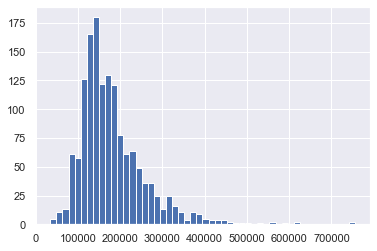

In [4]:
train_test['SalePrice'].hist(bins=50); plt.show()

sns.displot(data=train_test['SalePrice'])

In [5]:
df = pd.concat([train_test, X_sub]); df.shape

(2919, 81)

# data classify

In [49]:
# 시계열 컬럼(datetime)은 set_index로 빼놓기
# object / numeric

# numeric : unique check -> disc or cont
df.iloc[:, 20:40].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  2919 non-null   int64  
 1   RoofStyle     2919 non-null   object 
 2   RoofMatl      2919 non-null   object 
 3   Exterior1st   2918 non-null   object 
 4   Exterior2nd   2918 non-null   object 
 5   MasVnrType    2895 non-null   object 
 6   MasVnrArea    2896 non-null   float64
 7   ExterQual     2919 non-null   object 
 8   ExterCond     2919 non-null   object 
 9   Foundation    2919 non-null   object 
 10  BsmtQual      2838 non-null   object 
 11  BsmtCond      2837 non-null   object 
 12  BsmtExposure  2837 non-null   object 
 13  BsmtFinType1  2840 non-null   object 
 14  BsmtFinSF1    2918 non-null   float64
 15  BsmtFinType2  2839 non-null   object 
 16  BsmtFinSF2    2918 non-null   float64
 17  BsmtUnfSF     2918 non-null   float64
 18  TotalBsmtSF   2918 non-null 

In [102]:
a = pd.DataFrame(np.arange(10).reshape(-1, 2), columns=['A', 'B'])

,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [103]:
a.loc[3, 'B'] = np.nan
a

,A,B
0,0,1.0
1,2,3.0
2,4,5.0
3,6,NaN
4,8,9.0


In [104]:
a['B'].mask(a['B'].isna(), a['A'].mean() * 10, inplace=True)

In [105]:
a

,A,B
0,0,1.0
1,2,3.0
2,4,5.0
3,6,40.0
4,8,9.0


In [ ]:
# 상관분석 전 결측처리와, 후 결측처리는 결과가 다름.
# 정확한 상관분석을 위해서는 결측처리 후 상관분석을 해야하지만,
# 일단 대충이라도 결측처리 후 상관분석을 하기도 함

# 파생변수
# 인코딩을 한 후, 파생을 하게 되면 문제가 생김.
# 컬럼이 많아지기 때문에, 상관분석이 어려움
# 파생변수를 만들고 나서, 인코딩을 하는 것이 편함

# .astype('category') : LabelEncoder와 같은 기능

# 평가 --------------
# 1. 모델 여러개 사용해서 점수 확인 : 대표적 모델, 강한 모델, 약한 모델 다 사용해볼 것
#    - 약한 모델을 섞어서 앙상블 하기 위함
# 2. 학습량 늘리기 : cv(fold), smote/near, threshold(분류)
# 3. 앙상블
# 4. stacking : 다양한 모델들을 준비(같은 모델들도 가능)해서
#               모델들 예측의 proba 평균으로 예측값 도출하여 재학습(retrain)
# 5. tuning   : hyper param, api tool

# stacking

In [ ]:
# 모델들의 probas_pred를 모아서 feature로 구성하여 학습
# 스태킹은 반드시 cv를 겸비해야 한다. 그렇지 않으면 그냥 앙상블 효과일 뿐
# cv하지 않으면 과적합 가능성이 매우 크다.

# 과적합을 막을 방법은 여러 번 돌려서 cv를 무조건 써야 한다.
# fold + stacking 합쳐서 사용

# cross_val 함수를 사용할 수 없음
# RidgeCV 등이 스태킹 지원

train에 대한 예측, test에 대한 예측을 별도로 a

# optimizer

In [ ]:
# optuna
# 1. 객체 함수 구성
# 2. 하이퍼 파람을 사용할 수 있는 trial 객체 구성 : 파라미터 fit
# 3. study 객체 구성,       : pred 파라미터

# (x - 2)^2 함수

# study = optuna.create_study()
# study.optimize(objective, n_trials=100)
# study.best_params

In [109]:
# !pip install optuna

In [116]:
df = pd.read_csv('../pima/diabetes.csv')
df.info(); df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

----------------------------------------------------------------------
model  = RandomForestClassifier
f1_macro  = 0.7016432214522188   accuracy  = 0.7409218232747644   
precision = 0.7152297223272555   recall    = 0.6954318658280922   
AUC_ovr   = 0.8207599580712788  


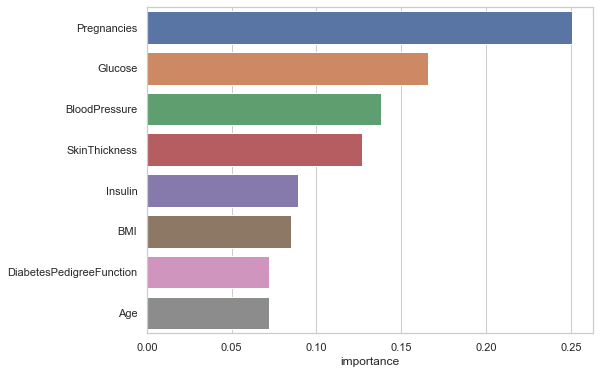

----------------------------------------------------------------------
model  = GradientBoostingClassifier
f1_macro  = 0.7212296824298841   accuracy  = 0.7552414905356082   
precision = 0.7327634755297336   recall    = 0.7150552061495457   
AUC_ovr   = 0.8234814814814815  


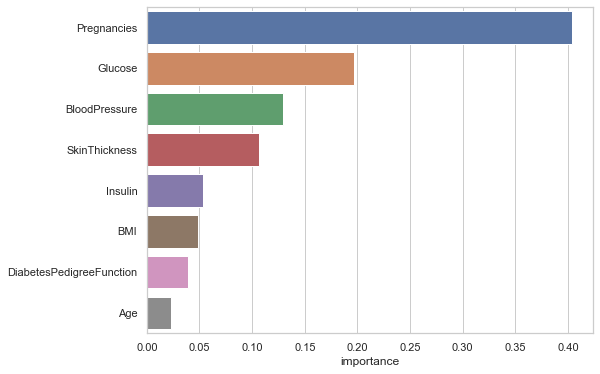

[16:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:51:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

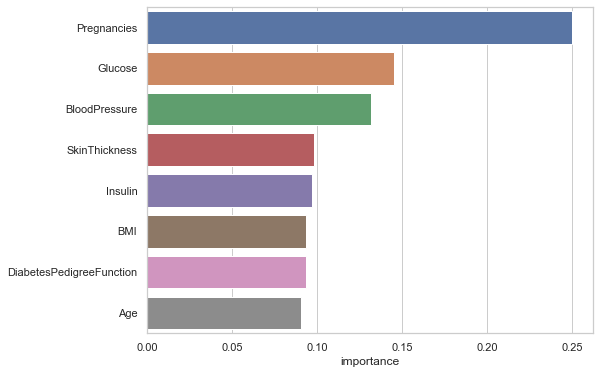

[16:51:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:51:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

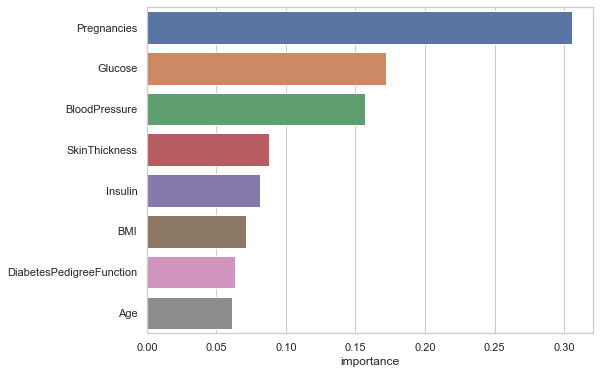

----------------------------------------------------------------------
model  = LGBMClassifier
f1_macro  = 0.695952014784838   accuracy  = 0.731729055258467   
precision = 0.7034003514512799   recall    = 0.6917344514325647   
AUC_ovr   = 0.7948050314465409  


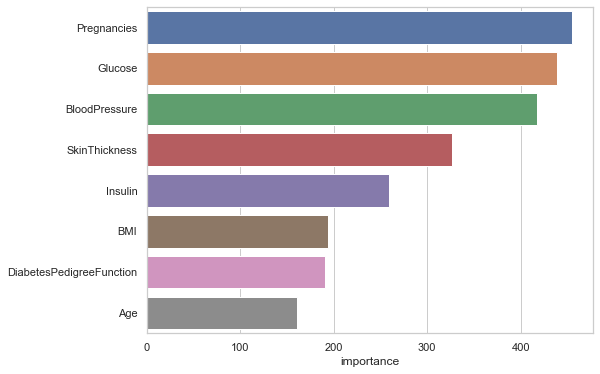

----------------------------------------------------------------------
model  = CatBoostClassifier
f1_macro  = 0.7245608529924872   accuracy  = 0.7604532722179782   
precision = 0.7386454725226954   recall    = 0.7173515024458421   
AUC_ovr   = 0.8274437456324248  


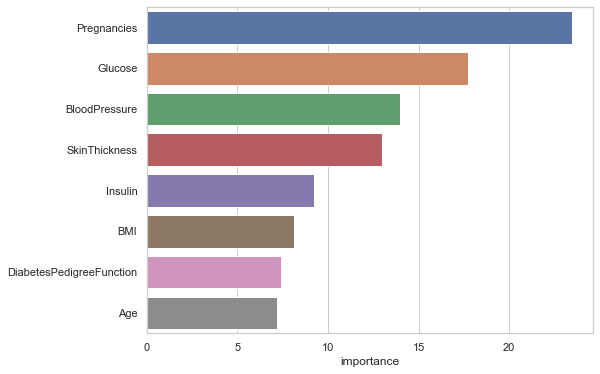

In [121]:
# classification cross_validate : INPUT DF VERSION & TARGET
# ==================================================
df_met     = df
target_met = 'Outcome'
# ==================================================

# X, y split
train_met = df_met[df_met[target_met].notna()]
X_met = train_met.drop(target_met, axis=1)
y_met = train_met[target_met]

# estimators=
classification_models = [RandomForestClassifier(random_state=0),
                         GradientBoostingClassifier(random_state=0),
                         XGBClassifier(random_state=0),
                         XGBRFClassifier(random_state=0),
                         LGBMClassifier(random_state=0),
                         CatBoostClassifier(random_state=0, verbose=0),
                         ]

# scorings=
classification_scorers = {'f1_macro':'f1_macro', 'accuracy':'accuracy',
                          'precision':'precision_macro', 'recall':'recall_macro', 
                          'roc_auc_ovr':'roc_auc_ovr',}

# cv=
kf  = KFold          (n_splits=5, shuffle=True, random_state=0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# cross_validate loop
for model in classification_models:
    
    cv_results = cross_validate(model, X_met, y_met,
                                scoring=classification_scorers,
                                cv=skf,
                                return_train_score=True, return_estimator=True)
    
    print('-' * 70)
    print('model  =', model.__class__.__name__)
    # print('params =', model.get_params(deep=True))
    
    # classification metrics
    print('f1_macro  = {}  '.format(cv_results['test_f1_macro'].mean()),
          'accuracy  = {}  '.format(cv_results['test_accuracy'].mean()), '\n'
          'precision = {}  '.format(cv_results['test_precision'].mean()),
          'recall    = {}  '.format(cv_results['test_recall'].mean()), '\n'
          'AUC_ovr   = {}  '.format(cv_results['test_roc_auc_ovr'].mean()),
          )
    
    fi_list = []
    for idx, estimator in enumerate(cv_results['estimator']):
        fi = pd.DataFrame(estimator.feature_importances_, 
                          index=X_met.columns, columns=['importance']).sort_values('importance', ascending=False)
        
        fi_list.append(estimator.feature_importances_.tolist())
    fi_means = np.array(fi_list).mean(axis=0)
    fi_df = pd.DataFrame(fi_means, columns=['importance'], index=X_met.columns).sort_values(by='importance', ascending=False)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.set_theme(style='whitegrid')
    sns.set_color_codes('pastel')
    sns.barplot(x='importance', y=X_met.columns, data=fi_df)
    plt.show()

In [123]:
import optuna
from sklearn.metrics import log_loss

In [124]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [151]:
# 1. objective function

def opt_obj(trial): # 2. hyper param trial
    
    param = {
            #  'n_estimators':      trial.suggest_uniform('n_estimators', 100, 200), 
             'min_samples_leaf':  trial.suggest_uniform('min_samples_leaf', 0.0, 0.5),
             'min_samples_split': trial.suggest_uniform('min_samples_split', 0.0, 1.0),
    }
    
    model = RandomForestClassifier(**param)
    
    model.fit(X_train, y_train)
    
    y_pred      = model.predict      (X_test)
    probas_pred = model.predict_proba(X_test)
    
    score = log_loss(y_test, probas_pred)
    
    return score

In [161]:
study = optuna.create_study(optuna.samplers.TPESampler(seed=0), directions='minimize')

study.optimize(opt_obj, n_trials=100)

ValueError: Please set either 'minimize' or 'maximize' to direction. You can also set the corresponding `StudyDirection` member.

In [153]:
best_param = study.best_params

In [154]:
best_param

{'min_samples_leaf': 0.0032318701940432437,
 'min_samples_split': 0.0034717239808105815}

In [155]:
# param fit
model = RandomForestClassifier(**best_param)

model.fit(X_train, y_train)

y_pred      = model.predict      (X_test)
probas_pred = model.predict_proba(X_test)

score = log_loss(y_test, probas_pred)
score

0.4216362432940645

In [ ]:
RandomForestClassifier